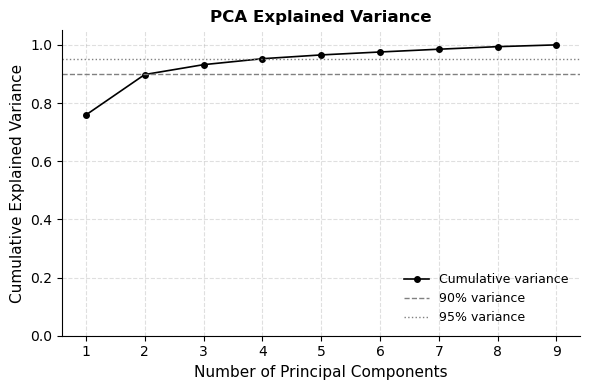

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

df = pd.read_csv("cpgs_with_ME_ID.tsv", sep="\t")

# Drop columns 'Primed_sample_2_frac' and 'primed_sample_2_cov' if they exist
cols_to_drop = ['Primed_sample_2_frac', 'Primed_sample_2_cov']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

frac_cols = [col for col in df.columns if col.endswith('_frac')]

X = df[frac_cols].dropna()
# Assuming you have a dataframe 'X' with your features (e.g., methylation fractions)
# You can replace this with your actual DataFrame
# Example: X = df[frac_cols].dropna()

pca = PCA()
X_pca = pca.fit_transform(X)
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# === Plot: Explained variance ===
fig, ax = plt.subplots(figsize=(6, 4))  # Use 6x4 inches for publication-size plot

ax.plot(
    range(1, len(cumulative_var) + 1),
    cumulative_var,
    marker='o',
    markersize=4,
    linestyle='-',
    color='black',
    linewidth=1.2,
    label='Cumulative variance'
)

# Horizontal reference lines
ax.axhline(0.90, color='grey', linestyle='--', linewidth=1, label='90% variance')
ax.axhline(0.95, color='grey', linestyle=':', linewidth=1, label='95% variance')

# Axis styling
ax.set_xlabel('Number of Principal Components', fontsize=11)
ax.set_ylabel('Cumulative Explained Variance', fontsize=11)
ax.set_title('PCA Explained Variance', fontsize=12, weight='bold')
ax.set_xticks(range(1, len(cumulative_var) + 1))
ax.set_ylim(0, 1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.4)
ax.tick_params(axis='both', labelsize=10)

# Legend
ax.legend(frameon=False, fontsize=9, loc='lower right')

# === Save figure ===
plt.tight_layout()
plt.show()

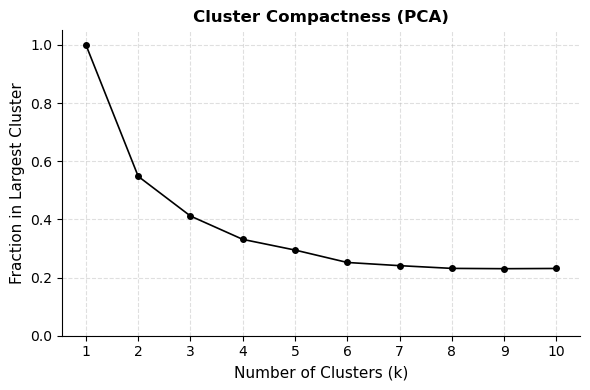

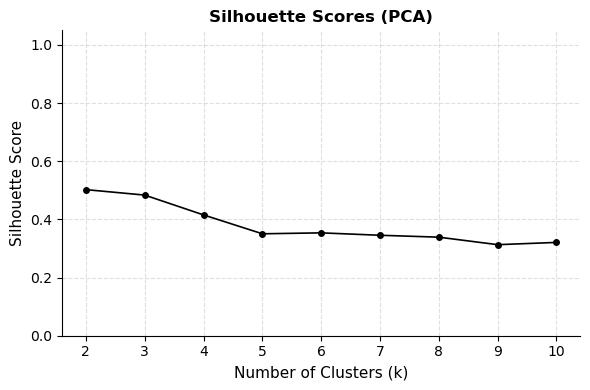

In [28]:
import pandas as pd                   # For data loading and manipulation
import numpy as np                    # For numerical operations like bincount
from sklearn.decomposition import PCA            # For PCA
from sklearn.cluster import KMeans               # For KMeans clustering
from sklearn.metrics import silhouette_score     # For silhouette score calculation
import matplotlib.pyplot as plt 
df = pd.read_csv("cpgs_with_ME_ID.tsv", sep="\t")

# Drop columns 'Primed_sample_2_frac' and 'primed_sample_2_cov' if they exist
cols_to_drop = ['Primed_sample_2_frac', 'Primed_sample_2_cov']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

frac_cols = [col for col in df.columns if col.endswith('_frac')]

X = df[frac_cols].dropna()

# Run PCA (keeping all components)
pca = PCA()
X_pca = pca.fit_transform(X)

# Test clustering for k = 1 to 10
k_range = range(1, 11)
fractions = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    
    # Fraction in largest cluster
    counts = np.bincount(labels)
    max_fraction = counts.max() / len(labels)
    fractions.append(max_fraction)
    
    # Silhouette score (undefined for k=1)
    if k > 1:
        sil = silhouette_score(X_pca, labels)
    else:
        sil = np.nan
    silhouette_scores.append(sil)

# === Plot 1: Fraction in largest cluster ===
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(k_range, fractions, marker='o', color='black', linewidth=1.2, markersize=4)
ax.set_xlabel('Number of Clusters (k)', fontsize=11)
ax.set_ylabel('Fraction in Largest Cluster', fontsize=11)
ax.set_title('Cluster Compactness (PCA)', fontsize=12, weight='bold')
ax.set_xticks(k_range)
ax.set_ylim(0, 1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.4)
ax.tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()

# === Plot 2: Silhouette Score ===
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(k_range[1:], silhouette_scores[1:], marker='o', color='black', linewidth=1.2, markersize=4)
ax.set_xlabel('Number of Clusters (k)', fontsize=11)
ax.set_ylabel('Silhouette Score', fontsize=11)
ax.set_title('Silhouette Scores (PCA)', fontsize=12, weight='bold')
ax.set_xticks(k_range[1:])
ax.set_ylim(0, 1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.4)
ax.tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()

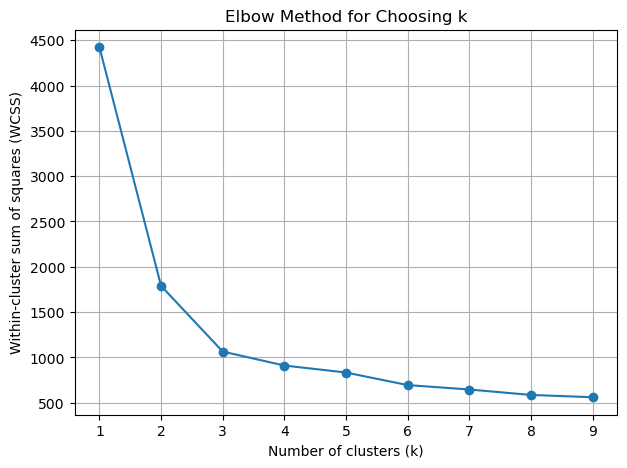

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
k_values = range(1, 10)  # try k from 1 to 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)  # inertia_ is WCSS

plt.figure(figsize=(7,5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Choosing k')
plt.grid(True)
plt.show()


/data/cephfs-1/home/users/cama15_c/.local/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


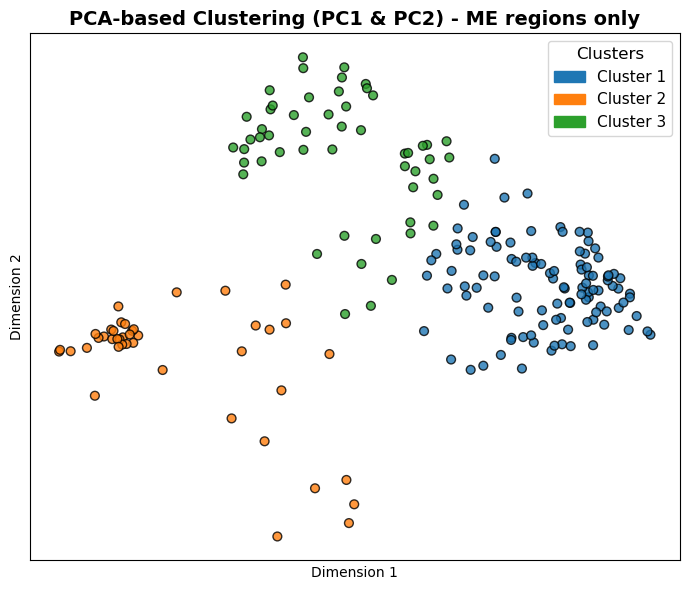

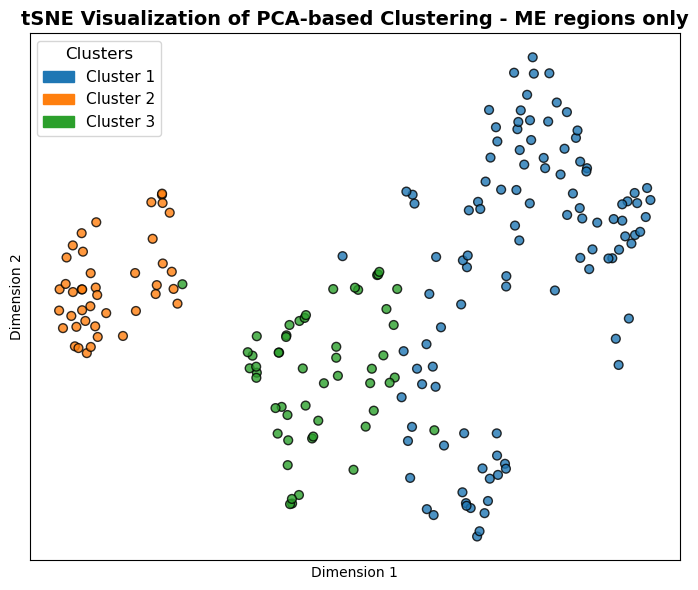

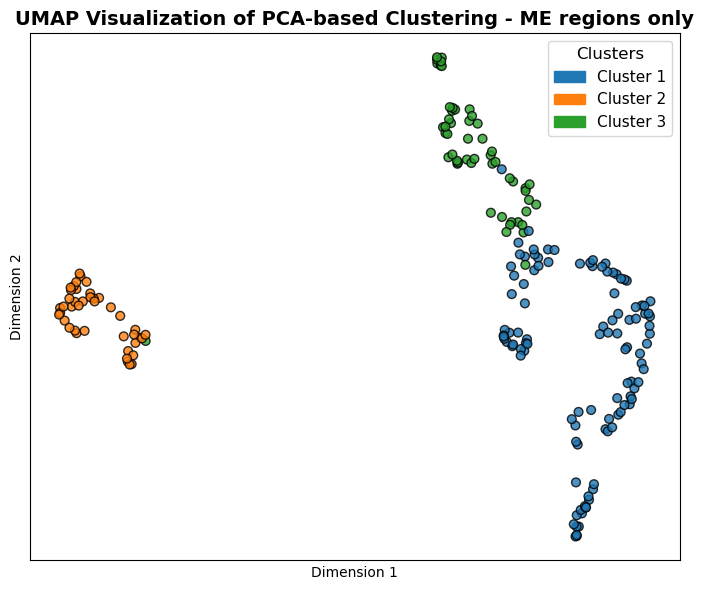

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df = pd.read_csv("inv_cpgs_with_ME_ID.tsv", sep="\t")

# Drop columns 'Primed_sample_2_frac' and 'primed_sample_2_cov' if they exist
cols_to_drop = ['Primed_sample_2_frac', 'Primed_sample_2_cov']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Keep only rows where ME_ID is not null (i.e., within ME regions)
df_me = df[df['ME_ID'].notna()]

# Extract only _frac columns
frac_cols = [col for col in df_me.columns if col.endswith('_frac')]
X_me = df_me[frac_cols].dropna()

# PCA on methylation fractions within ME regions
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_me)

# Clustering on PCA components
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# tSNE and UMAP for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_pca)

reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_pca)

# Plotting function
def plot_clusters(X_embedded, labels, title):
    plt.figure(figsize=(7, 6))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    label_colors = [colors[label] for label in labels]

    plt.scatter(
        X_embedded[:, 0],
        X_embedded[:, 1],
        c=label_colors,
        s=40,
        alpha=0.8,
        edgecolor='k'
    )
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    patches = [mpatches.Patch(color=colors[i], label=f'Cluster {i+1}') for i in range(3)]
    plt.legend(handles=patches, title='Clusters', fontsize=11, title_fontsize=12, loc='best')
    plt.tight_layout()
    plt.show()

# Visualizations
plot_clusters(X_pca[:, :2], clusters_pca, 'PCA-based Clustering (PC1 & PC2) - ME regions only')
plot_clusters(X_tsne, clusters_pca, 'tSNE Visualization of PCA-based Clustering - ME regions only')
plot_clusters(X_umap, clusters_pca, 'UMAP Visualization of PCA-based Clustering - ME regions only')

In [5]:
# 1. Keep only rows with non-null fraction columns (same as X_me)
df_me_filtered = df_me.loc[X_me.index].copy()  # select rows by index from X_me

# 2. Assign cluster labels
df_me_filtered['Cluster'] = clusters_pca

# 3. Group by cluster and extract (Chr, Start, End)
regions_per_cluster = {}
for cluster_id, group in df_me_filtered.groupby('Cluster'):
    regions = group[['Chr', 'Start', 'End']].to_dict(orient='records')
    regions_per_cluster[cluster_id] = regions


In [6]:
# Assuming df_me_filtered already has 'Cluster' column added
df_me_filtered.to_csv('inv_cpgs_clusters_regions_2.csv', columns=['Chr', 'Start', 'End', 'Cluster'], index=False)

In [7]:
import pandas as pd
import pyranges as pr
import gzip

# Load CpGs
df_cpgs = pd.read_csv("inv_cpgs_clusters_regions_2.csv")
df_cpgs = df_cpgs.rename(columns={"Chr": "Chromosome"})
df_cpgs["Chromosome"] = df_cpgs["Chromosome"].astype(str)
df_cpgs["Start"] = df_cpgs["Start"].astype(int)
df_cpgs["End"] = df_cpgs["End"].astype(int)
gr_cpgs = pr.PyRanges(df_cpgs[["Chromosome", "Start", "End"]])

# Annotate overlaps with BED files
bed_files = {
    "TSS": "gencode_v48_TSSs.bed",
    "Promoter": "gencode_v48_promoters.bed",
    "GeneBody": "gencode_v48_gene_bodies.bed",
    "Exon": "gencode_v48_exons.bed",
    "Intron": "gencode_v48_introns.bed"
}

for feature_name, bed_file in bed_files.items():
    gr_feature = pr.read_bed(bed_file)
    
    # Expand TSS by ±1000 bp
    if feature_name == "TSS":
        df_feat = gr_feature.df.copy()
        df_feat["Start"] = df_feat["Start"] - 1000
        df_feat["End"] = df_feat["End"] + 1000
        gr_feature = pr.PyRanges(df_feat)
    
    overlaps = gr_cpgs.overlap(gr_feature)
    overlapped_intervals = set(zip(overlaps.df["Chromosome"], overlaps.df["Start"], overlaps.df["End"]))
    
    def check_overlap(row):
        return (row["Chromosome"], row["Start"], row["End"]) in overlapped_intervals
    
    df_cpgs[f"Overlaps_{feature_name}"] = df_cpgs.apply(check_overlap, axis=1)

# Annotate GeneBody_Type based on GTF
gtf_file = "gencode.v48.basic.annotation.gtf.gz"
gtf_cols = ["Chromosome", "Source", "Feature", "Start", "End", "Score", "Strand", "Frame", "Attributes"]

with gzip.open(gtf_file, "rt") as f:
    gtf = pd.read_csv(f, sep="\t", comment="#", names=gtf_cols)

genes = gtf[gtf["Feature"] == "gene"].copy()
genes["gene_type"] = genes["Attributes"].str.extract(r'gene_type "([^"]+)"')
genes["gene_id"] = genes["Attributes"].str.extract(r'gene_id "([^"]+)"')

target_types = ["protein_coding", "lncRNA", "pseudogene", "miRNA"]
genes_filtered = genes[genes["gene_type"].isin(target_types)].copy()

gr_genes_filtered = pr.PyRanges(genes_filtered[["Chromosome", "Start", "End", "gene_type", "gene_id"]])
gr_gene_overlap = gr_cpgs.join(gr_genes_filtered)
overlap_df = gr_gene_overlap.df[["Chromosome", "Start", "End", "gene_type"]].drop_duplicates()
overlap_df.rename(columns={"gene_type": "GeneBody_Type"}, inplace=True)

df_cpgs = df_cpgs.merge(overlap_df, on=["Chromosome", "Start", "End"], how="left")
df_cpgs["GeneBody_Type"] = df_cpgs["GeneBody_Type"].fillna("None")

# Now annotate distances to multiple repeat types from rmsk.txt.gz
rmsk_file = "rmsk.txt.gz"
rmsk_cols = ["bin", "swScore", "milliDiv", "milliDel", "milliIns",
             "genoName", "genoStart", "genoEnd", "genoLeft",
             "strand", "repName", "repClass", "repFamily",
             "repStart", "repEnd", "repLeft", "id"]

rmsk = pd.read_csv(rmsk_file, sep="\t", names=rmsk_cols, header=None, compression='gzip')

# Filter to just key retrotransposons of interest by repClass or repName (case sensitive)
repeat_types = {
    "Alu": rmsk[rmsk["repName"].str.contains("Alu")],     # all Alu subfamilies
    "L1": rmsk[rmsk["repName"].str.contains("L1")],       # all L1 subfamilies
    "SVA": rmsk[rmsk["repName"].str.contains("SVA")],     # SVA family
    "MIR": rmsk[rmsk["repName"].str.contains("MIR")],     # MIR SINEs
    "LTR": rmsk[rmsk["repClass"].str.contains("LTR")]     # all LTR elements (ERVs)
}

# Convert filtered repeats to PyRanges, store for distance calc
pr_repeats = {}
for rep_type, df_rep in repeat_types.items():
    df_rep_rename = df_rep.rename(columns={"genoName": "Chromosome",
                                           "genoStart": "Start",
                                           "genoEnd": "End"})
    pr_repeats[rep_type] = pr.PyRanges(df_rep_rename[["Chromosome", "Start", "End"]])

# For each repeat type calculate nearest distance and proximity (within 100 bp)
for rep_type, gr_rep in pr_repeats.items():
    nearest = gr_cpgs.nearest(gr_rep)
    df_dist = nearest.df[["Chromosome", "Start", "End", "Distance"]].rename(columns={"Distance": f"Dist_to_{rep_type}"})
    df_cpgs = df_cpgs.merge(df_dist, on=["Chromosome", "Start", "End"], how="left")
    df_cpgs[f"Near_{rep_type}"] = df_cpgs[f"Dist_to_{rep_type}"].fillna(10**9) <= 1000  # 100bp proximity threshold

# Save final annotated CpG dataframe
df_cpgs = df_cpgs.sort_values(by="Cluster")
df_cpgs.to_csv("inv_cpgs_clusters_regions_annotated_boolean_and_type_me_final.csv", index=False)


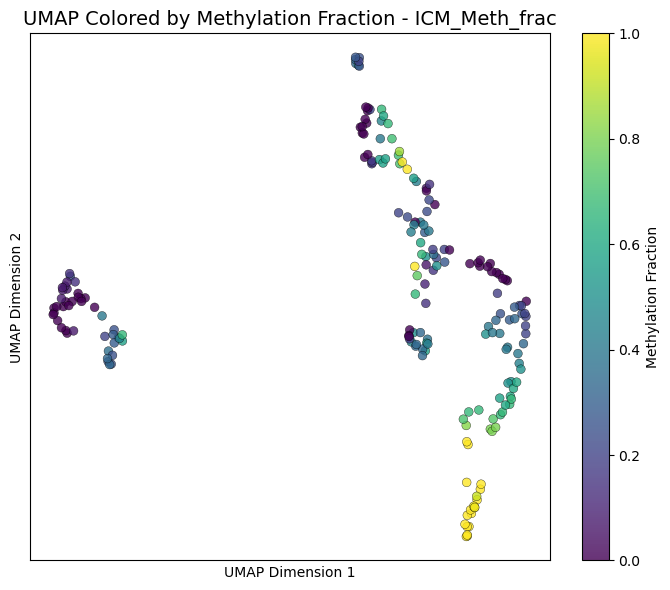

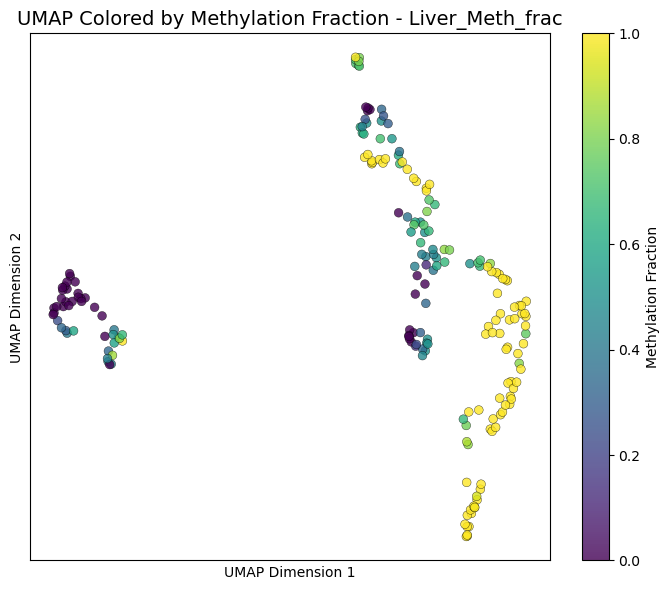

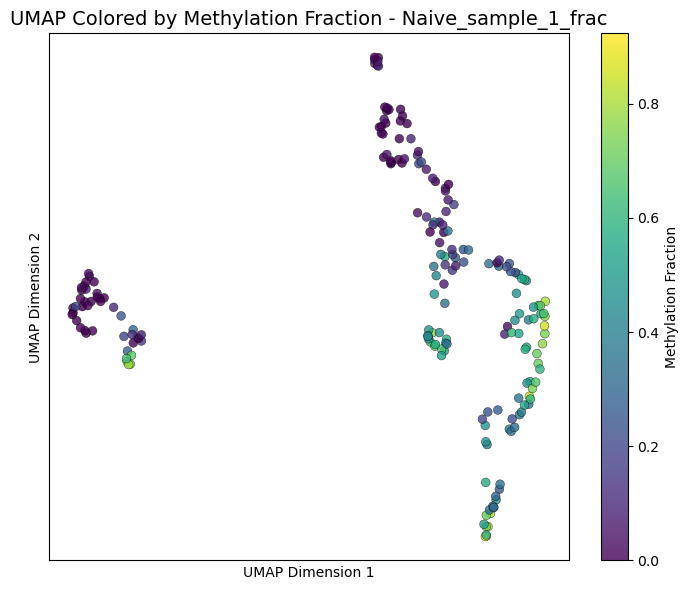

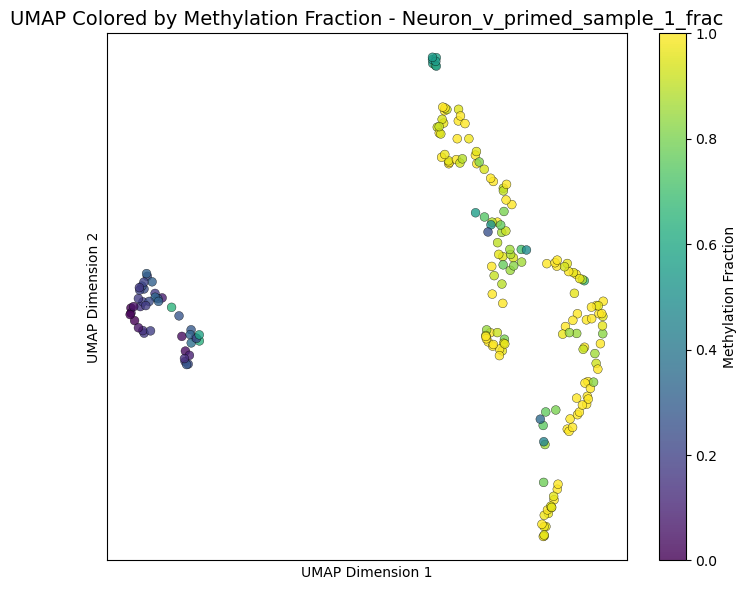

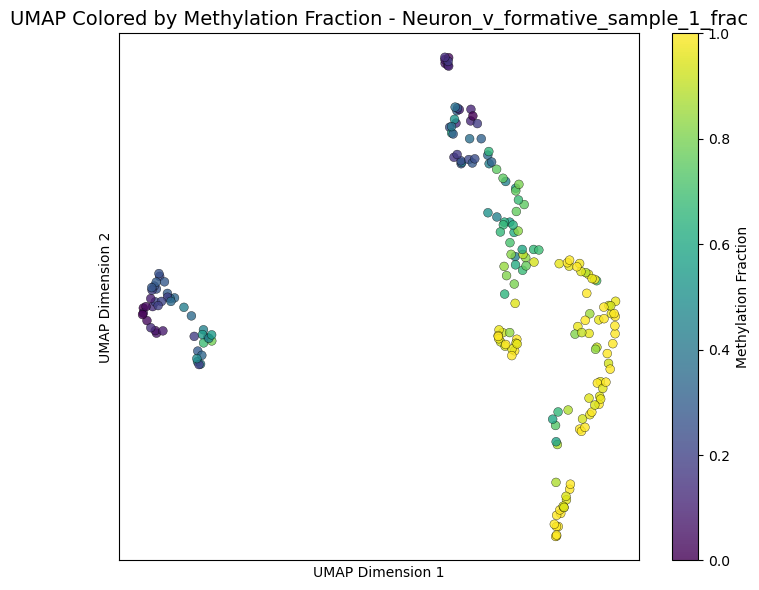

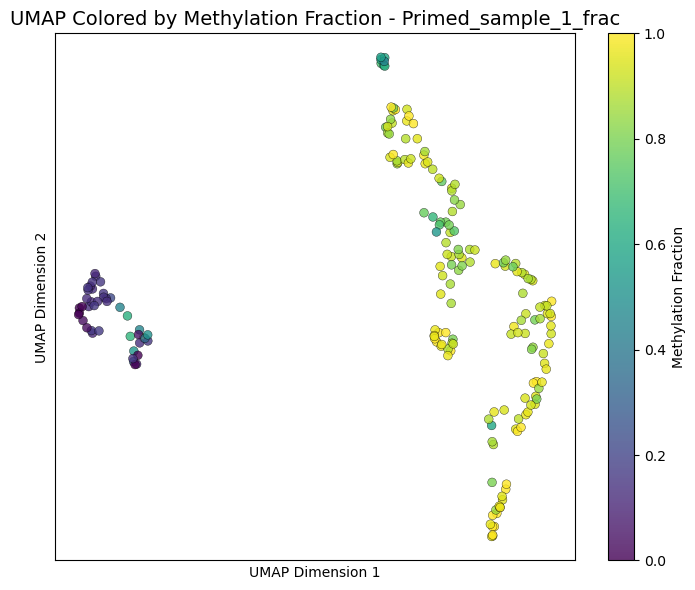

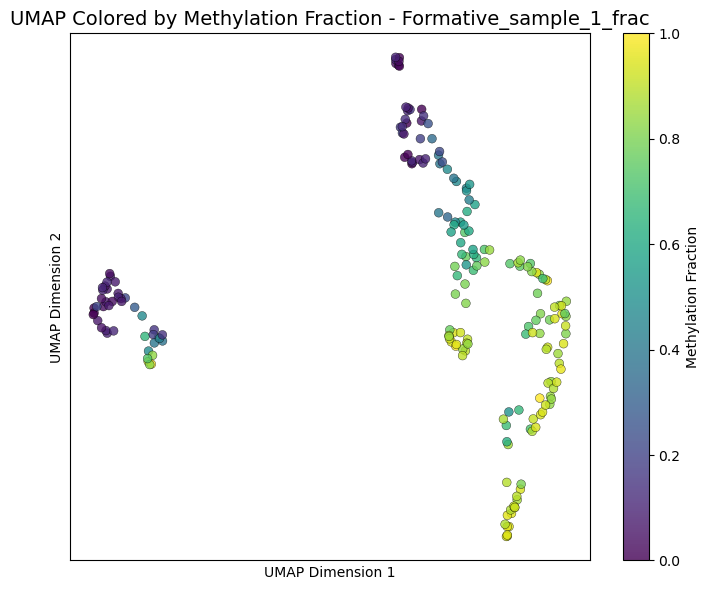

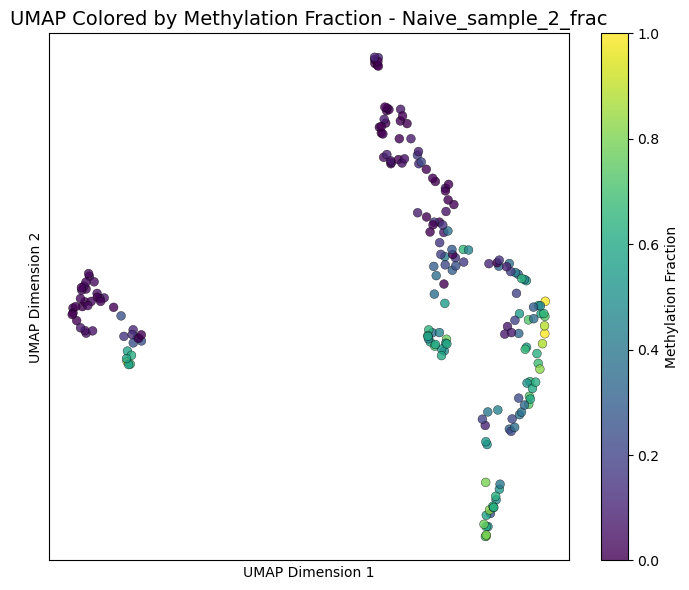

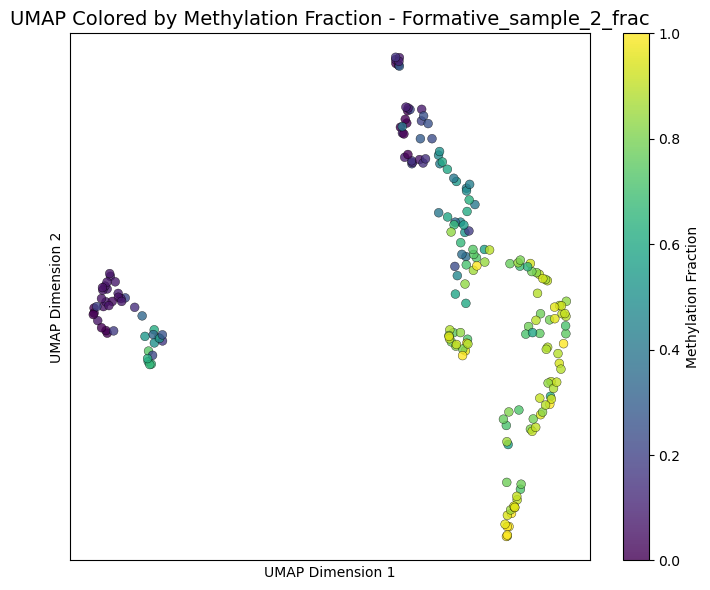

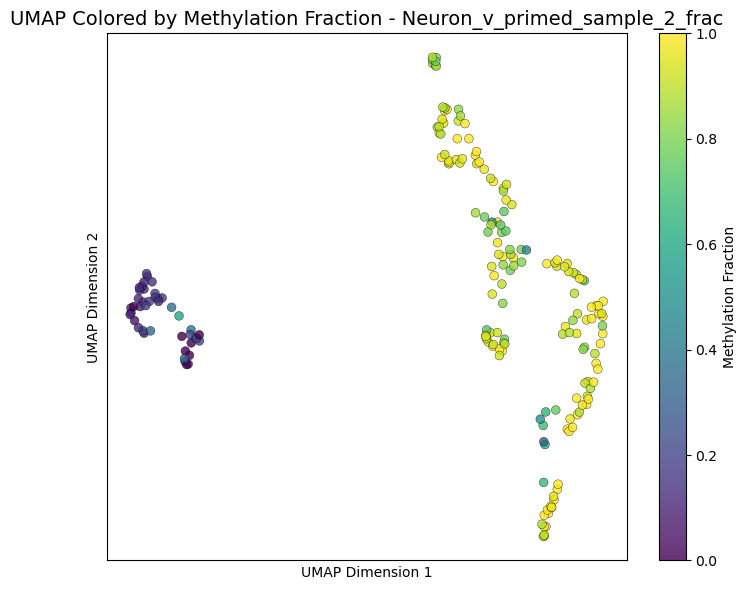

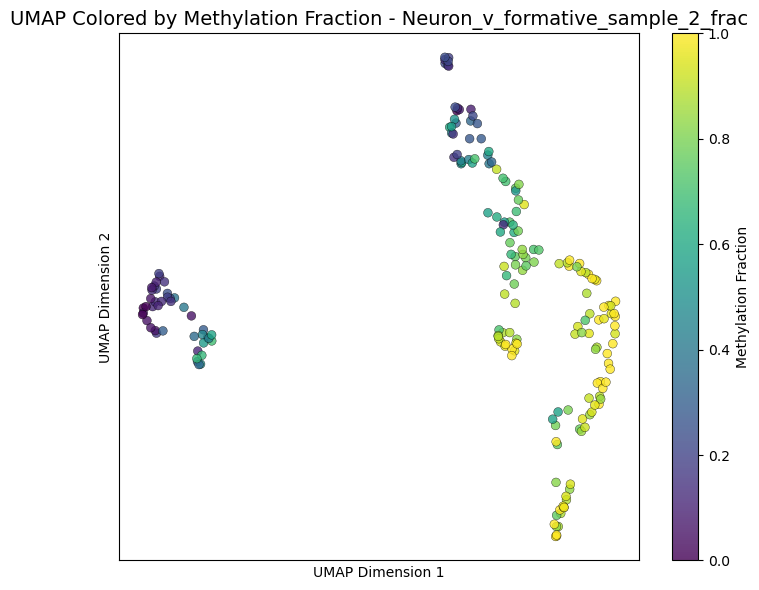

In [9]:
sample_frac_cols = [col for col in X_me.columns if col.endswith('_frac')]

# UMAP embedding matrix from before: shape (n_points, 2)
# X_umap

for i, sample_col in enumerate(sample_frac_cols, start=1):
    plt.figure(figsize=(7,6))
    
    # Get methylation fractions for this sample (rows aligned with X_umap)
    methylation_vals = X_me[sample_col].values
    
    # Scatter plot colored by methylation fraction with colormap
    sc = plt.scatter(
        X_umap[:, 0], 
        X_umap[:, 1], 
        c=methylation_vals,
        cmap='viridis',  # or 'plasma', 'inferno', 'cividis', etc.
        s=40,
        alpha=0.8,
        edgecolor='k',
        linewidth=0.3
    )
    
    plt.title(f'UMAP Colored by Methylation Fraction - {sample_col}', fontsize=14)
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.grid(False)    
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(sc, label='Methylation Fraction')
    plt.tight_layout()
    plt.show()

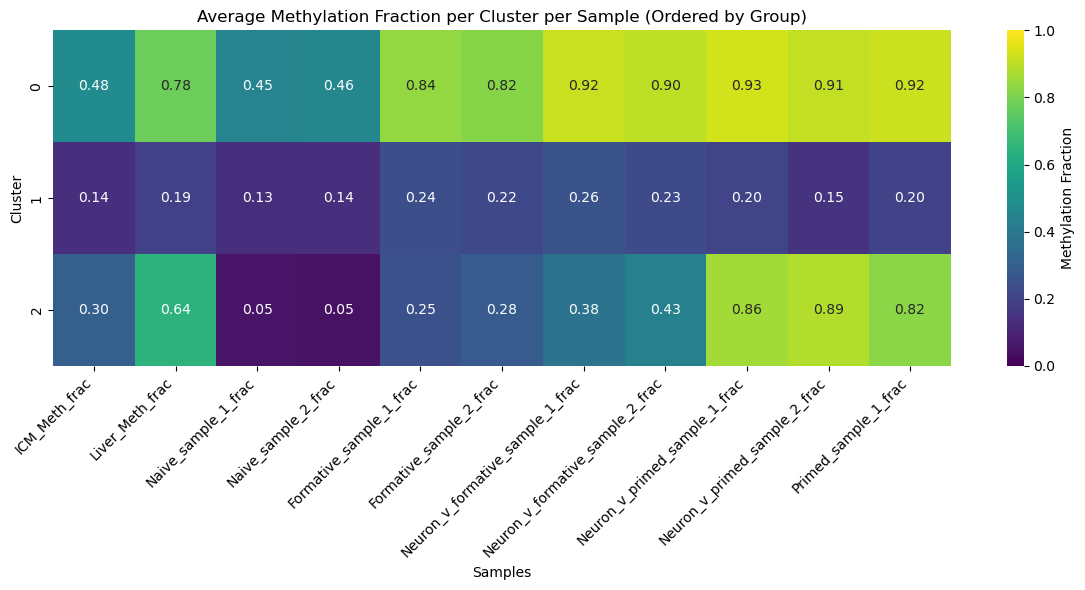

In [11]:
import re
import seaborn as sns

# Your desired group order
group_order = ['ICM', 'Liver', 'Naive', 'Formative', 'Neuron_v_Formative', 'Primed', 'Neuron_v_Primed']

# Function to assign group label based on sample name
def assign_group(sample_name):
    for group in group_order:
        if re.search(group, sample_name, re.IGNORECASE):
            return group
    return 'Other'  # fallback for samples not matching any group
    import seaborn as sns
cluster_means = df_me_filtered.groupby('Cluster')[frac_cols].mean()

# Extract columns (samples) from cluster_means
samples = cluster_means.columns.tolist()

# Create DataFrame with sample names and their group labels
sample_groups = pd.DataFrame({'Sample': samples})
sample_groups['Group'] = sample_groups['Sample'].apply(assign_group)

# Sort by group_order index and then alphabetically within groups
sample_groups['Group_order'] = sample_groups['Group'].apply(lambda x: group_order.index(x) if x in group_order else 999)
sample_groups_sorted = sample_groups.sort_values(['Group_order', 'Sample'])

# Get reordered list of samples
samples_sorted = sample_groups_sorted['Sample'].tolist()

plt.figure(figsize=(12, 6))
sns.heatmap(
    cluster_means[samples_sorted], 
    cmap='viridis', 
    annot=True, 
    fmt=".2f",
    vmin=0, vmax=1,  # Fix color scale from 0 to 1
    cbar_kws={'label': 'Methylation Fraction'}
)
plt.title('Average Methylation Fraction per Cluster per Sample (Ordered by Group)')
plt.xlabel('Samples')
plt.ylabel('Cluster')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Extract frac columns (samples)
frac_cols = [col for col in df_me.columns if col.endswith('_frac')]

# Drop rows with any NA in those columns (optional)
df_me_frac = df_me[frac_cols].dropna()

# Transpose to samples x CpGs
X_samples = df_me_frac.T  # rows = samples, cols = CpGs

# Now PCA on samples (points)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_samples = pca.fit_transform(X_samples)


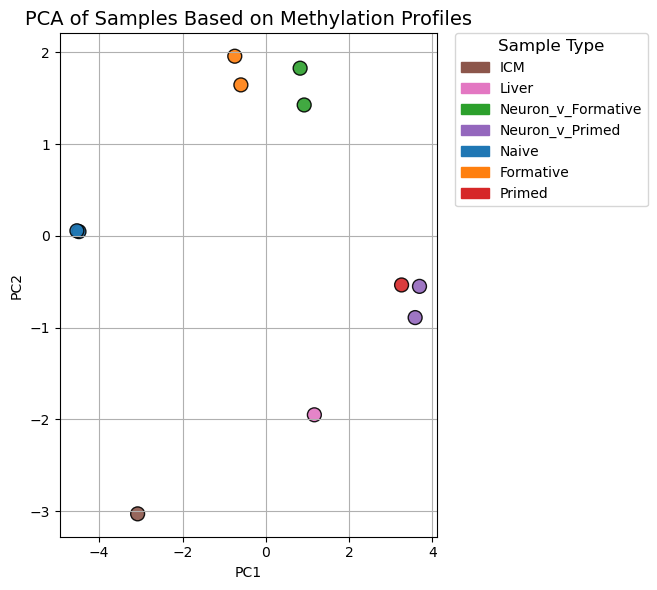

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re

group_order = ['ICM', 'Liver', 'Neuron_v_Formative', 'Neuron_v_Primed', 'Naive', 'Formative', 'Primed']
group_colors = {
    'Naive': '#1f77b4',
    'Formative': '#ff7f0e',
    'Neuron_v_Formative': '#2ca02c',
    'Primed': '#d62728',
    'Neuron_v_Primed': '#9467bd',
    'ICM': '#8c564b',
    'Liver': '#e377c2',
    'Other': '#7f7f7f'
}

def assign_group(sample_name):
    for group in group_order:
        if re.search(group, sample_name, re.IGNORECASE):
            return group
    return 'Other'

# Assuming sample names are in the index of X_samples DataFrame
sample_names = X_samples.index.tolist()
sample_groups = [assign_group(s) for s in sample_names]
sample_colors = [group_colors.get(g, group_colors['Other']) for g in sample_groups]

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca_samples[:, 0], 
    X_pca_samples[:, 1],
    c=sample_colors, 
    s=100, 
    edgecolors='k',  # fix matplotlib warning
    alpha=0.9
)

plt.title('PCA of Samples Based on Methylation Profiles', fontsize=14)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# Create legend patches in order of group_order
patches = [mpatches.Patch(color=group_colors[g], label=g) for g in group_order]

plt.legend(
    handles=patches, 
    title='Sample Type', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0, 
    fontsize=10, 
    title_fontsize=12
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space for legend on right
plt.show()



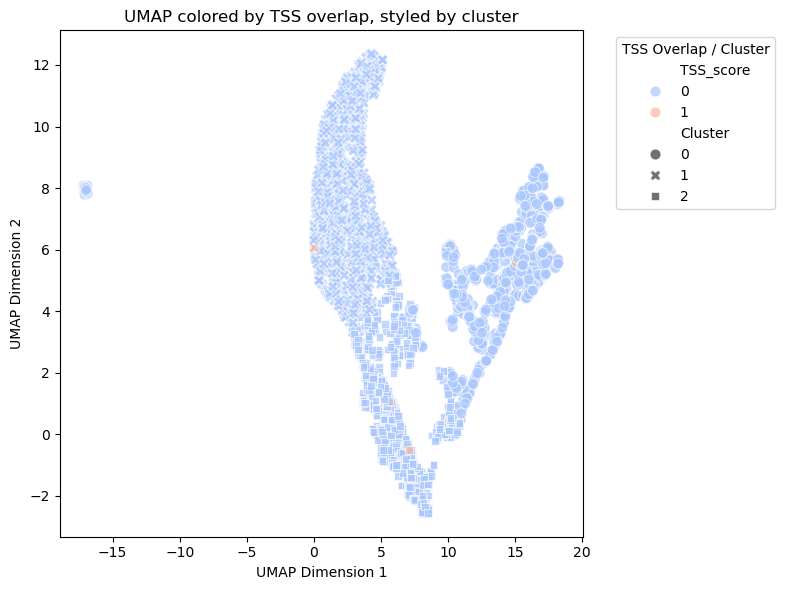

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your annotated dataframe with overlap columns
df = pd.read_csv("cpgs_clusters_regions_annotated_boolean.csv")

# Make sure the number of rows in df matches X_umap
assert df.shape[0] == X_umap.shape[0], "Mismatch between df rows and UMAP points"

# Create a combined DataFrame for plotting
umap_df = pd.DataFrame({
    'UMAP1': X_umap[:, 0],
    'UMAP2': X_umap[:, 1],
    'Cluster': df['Cluster'],  # your cluster info
    'Overlaps_TSS': df['Overlaps_TSS'].astype(bool)
})

# Add binary TSS score (0 or 1)
umap_df['TSS_score'] = umap_df['Overlaps_TSS'].astype(int)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=umap_df,
    x='UMAP1', y='UMAP2',
    hue='TSS_score',
    palette='coolwarm',
    style='Cluster',
    alpha=0.7,
    s=60
)

plt.title('UMAP colored by TSS overlap, styled by cluster')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='TSS Overlap / Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

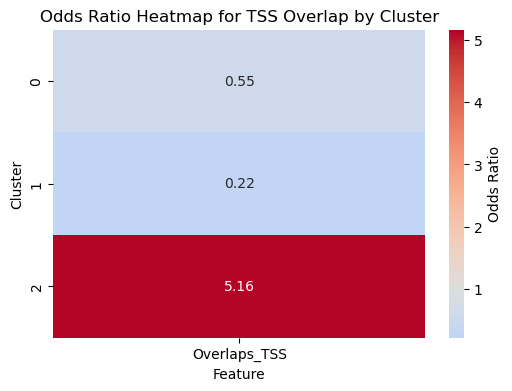

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
data = {
    'Cluster': [0, 1, 2],
    'Feature': ['Overlaps_TSS', 'Overlaps_TSS', 'Overlaps_TSS'],
    'OddsRatio': [0.55, 0.22, 5.16],
    'P-value': [0.4, 0.03, 0.002]
}

df = pd.DataFrame(data)

# Pivot for heatmap (clusters as rows, features as columns)
heatmap_data = df.pivot(index='Cluster', columns='Feature', values='OddsRatio')

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', center=1,
            cbar_kws={'label': 'Odds Ratio'})

plt.title('Odds Ratio Heatmap for TSS Overlap by Cluster')
plt.ylabel('Cluster')
plt.xlabel('Feature')

plt.show()

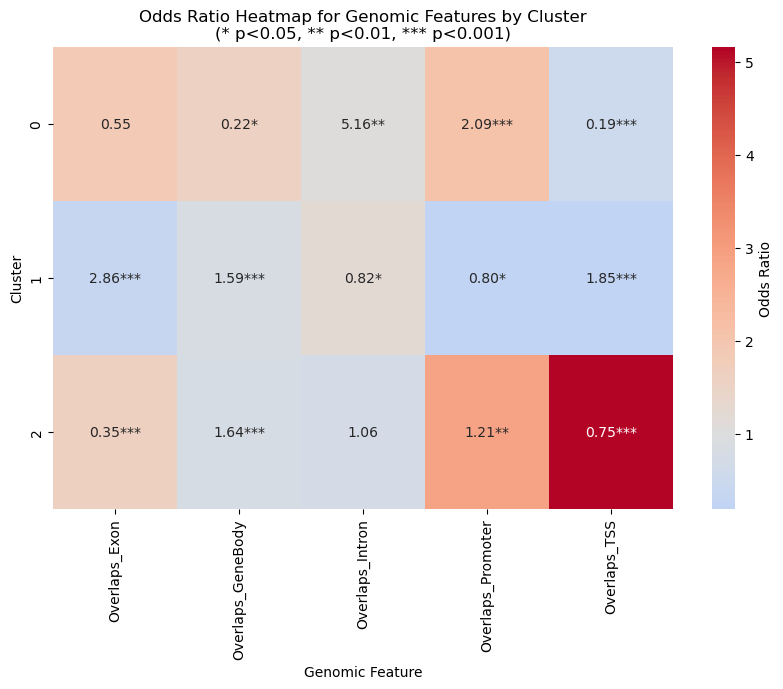

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Your full data as dictionary
data = {
    'Cluster': [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2],
    'Feature': [
        'Overlaps_TSS', 'Overlaps_TSS', 'Overlaps_TSS',
        'Overlaps_Promoter', 'Overlaps_Promoter', 'Overlaps_Promoter',
        'Overlaps_GeneBody', 'Overlaps_GeneBody', 'Overlaps_GeneBody',
        'Overlaps_Exon', 'Overlaps_Exon', 'Overlaps_Exon',
        'Overlaps_Intron', 'Overlaps_Intron', 'Overlaps_Intron'
    ],
    'OddsRatio': [
        0.55, 0.22, 5.16,
        2.09, 0.19, 2.86,
        1.59, 0.82, 0.80,
        1.85, 0.35, 1.64,
        1.06, 1.21, 0.75
    ],
    'P-value': [
        0.42, 0.03, 0.002,
        2.28e-28, 5.67e-135, 9.52e-52,
        2.28e-07, 0.015, 0.01,
        1.02e-18, 1.82e-51, 4.08e-12,
        0.39, 0.004, 5.44e-05
    ]
}

df = pd.DataFrame(data)

heatmap_data = df.pivot(index='Cluster', columns='Feature', values='OddsRatio')

def signif_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

annotations = df.apply(lambda row: f"{row['OddsRatio']:.2f}{signif_stars(row['P-value'])}", axis=1)
annot_matrix = annotations.values.reshape(len(df['Cluster'].unique()), len(df['Feature'].unique()))

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data, 
    annot=annot_matrix, fmt='', 
    cmap='coolwarm', center=1,
    cbar_kws={'label': 'Odds Ratio'}
)

plt.title('Odds Ratio Heatmap for Genomic Features by Cluster\n(* p<0.05, ** p<0.01, *** p<0.001)')
plt.ylabel('Cluster')
plt.xlabel('Genomic Feature')
plt.savefig('odds_ratio_heatmap_MEs.png', dpi=300, bbox_inches='tight')

plt.show()



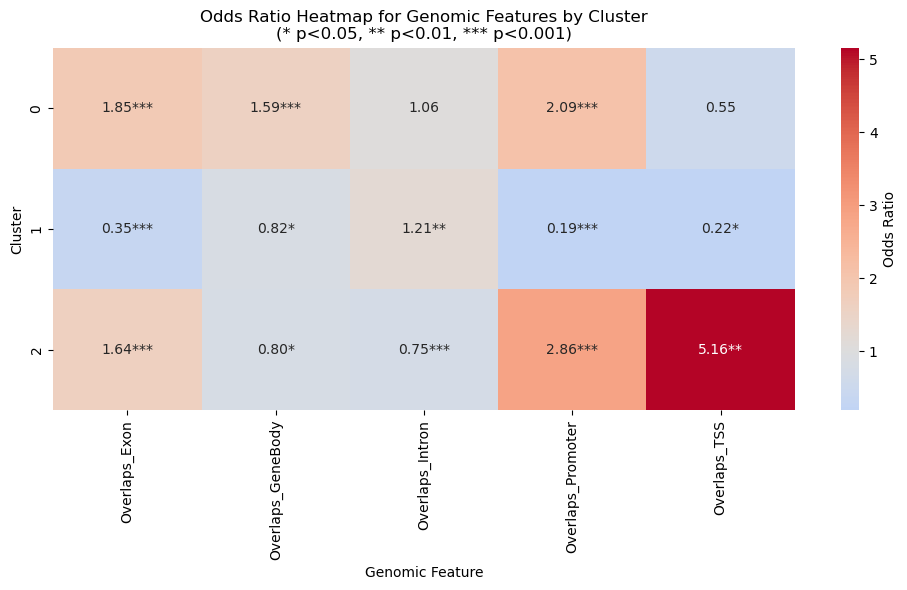

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Your full data as dictionary
data = {
    'Cluster': [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2],
    'Feature': [
        'Overlaps_TSS', 'Overlaps_TSS', 'Overlaps_TSS',
        'Overlaps_Promoter', 'Overlaps_Promoter', 'Overlaps_Promoter',
        'Overlaps_GeneBody', 'Overlaps_GeneBody', 'Overlaps_GeneBody',
        'Overlaps_Exon', 'Overlaps_Exon', 'Overlaps_Exon',
        'Overlaps_Intron', 'Overlaps_Intron', 'Overlaps_Intron'
    ],
    'OddsRatio': [
        0.55, 0.22, 5.16,
        2.09, 0.19, 2.86,
        1.59, 0.82, 0.80,
        1.85, 0.35, 1.64,
        1.06, 1.21, 0.75
    ],
    'P-value': [
        0.42, 0.03, 0.002,
        2.28e-28, 5.67e-135, 9.52e-52,
        2.28e-07, 0.015, 0.01,
        1.02e-18, 1.82e-51, 4.08e-12,
        0.39, 0.004, 5.44e-05
    ]
}

df = pd.DataFrame(data)

# Pivot for heatmap data
heatmap_data = df.pivot(index='Cluster', columns='Feature', values='OddsRatio')

# Function to assign significance stars
def signif_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

# Create annotation column with formatted OR + significance stars
df['annot'] = df.apply(lambda row: f"{row['OddsRatio']:.2f}{signif_stars(row['P-value'])}", axis=1)

# Pivot annotation matrix to align with heatmap
annot_data = df.pivot(index='Cluster', columns='Feature', values='annot')

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=annot_data,
    fmt='',
    cmap='coolwarm',
    center=1,
    cbar_kws={'label': 'Odds Ratio'}
)

plt.title('Odds Ratio Heatmap for Genomic Features by Cluster\n(* p<0.05, ** p<0.01, *** p<0.001)')
plt.ylabel('Cluster')
plt.xlabel('Genomic Feature')
plt.tight_layout()
plt.savefig('odds_ratio_heatmap_MEs.png', dpi=300, bbox_inches='tight')
plt.show()
